## 2. Machine Learning for Regression

In [40]:
import pandas as pd
import numpy as np

In [41]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'


In [42]:
!wget $data

--2025-06-07 20:37:25--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1.41M  --.-KB/s    in 0.02s   

2025-06-07 20:37:25 (92.1 MB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [43]:
df = pd.read_csv('data.csv')

In [44]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [45]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [46]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [47]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [48]:
# df.info()
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [49]:
strings = df.dtypes[df.dtypes =='object'].index
strings

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [50]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [51]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Exploratory data analysis



In [52]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


In [53]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

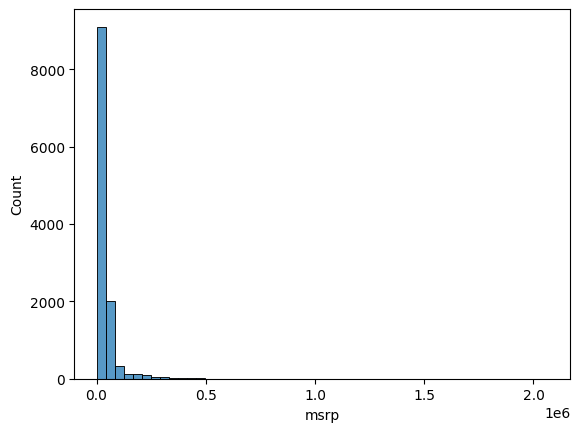

In [55]:
sns.histplot(df.msrp,bins = 50)
plt.show()

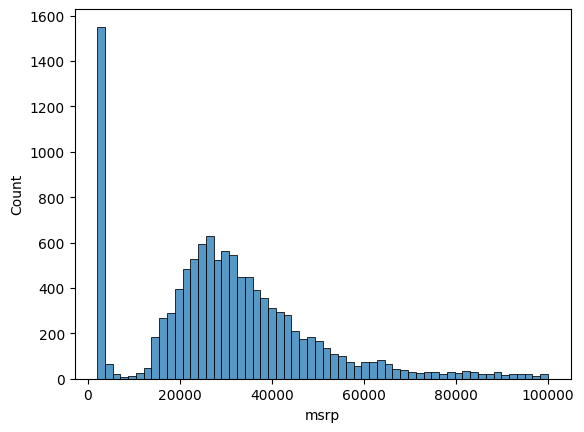

In [56]:
sns.histplot(df.msrp[df.msrp <=100000])
plt.show()

In [57]:
# log(0) throws error
# so add 1 to all
np.log1p([0,1,10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [58]:
np.log([0+1,1+1,10+1,1000+1,100000+1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [59]:
price_logs = np.log1p(df.msrp)

In [60]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

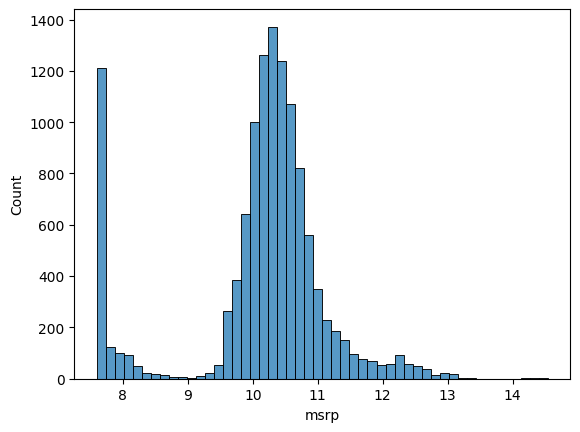

In [61]:
sns.histplot(price_logs, bins = 50)
plt.show()
#the shape is normal distribution


In [62]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation framework

In [63]:
# divide the dataset into (train, val, test ; 60,20,20)

In [64]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n* 0.2)
n_train = n - n_val - n_test

In [65]:
n, n_val + n_test + n_train

(11914, 11914)

In [66]:
df.iloc[:10]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [67]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [68]:
idx = np.arange(n)

In [69]:
np.random.seed(2)
np.random.shuffle(idx)

In [70]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [71]:
idx[:n_train]

array([2735, 6720, 5878, ..., 9334, 5284, 2420], shape=(7150,))

In [72]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [73]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [74]:
len(df_train), len(df_test), len(df_val)

(7150, 2382, 2382)

In [75]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [76]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [77]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.5 Linear regression

In [78]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [79]:
def g(xi):
    # do something
    return 100000

In [80]:
xi = [453,11,86]

In [81]:
g(xi)

100000

In [82]:
w0 = 7.17
w = [0.01,0.04,0.02]

In [83]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [84]:
linear_regression(xi)

13.86

In [85]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.02]

In [86]:
np.expm1(12.86)

np.float64(384614.72579367505)

In [87]:
np.log1p(384614.72579367505)

np.float64(12.86)

## 2.6 Linear regression vector form

In [88]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res +xi[j] * w[j]
    return res

In [89]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [90]:
w_new = [w0]+w

In [91]:
w_new

[7.17, 0.01, 0.04, 0.02]

In [92]:
def linear_regression(xi):
    xi = [1] +xi
    return dot(xi, w_new)

In [93]:
linear_regression(xi)

13.86

In [94]:
w0 = 7.17
w = [0.01,0.04,0.02] 
w_new = [w0] + w

In [95]:
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x10 = [1,453,11,86]
X = [x1,x2,x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [96]:
def linear_regression(X):
    return X.dot(w_new)

In [97]:
linear_regression(X)

array([37.31, 50.11, 13.86])

## 2.7 Training a linear regression model

In [98]:
def train_linear_regression(X, y):
    pass

In [99]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [100]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [101]:
# reason for column stack ?
# added bias(w0) to our w
# w0 dot identity matrix = w0!
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [102]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [103]:
# g(X) = y
# g(X) = Xw
# Xw = y

# possibly?
# X^-1 dot X = X^-1 dot y 
# --> inverse of matrix doesnt always exist

# multiply X^T on both
# X^T X w = X^T y
# multiply inverse of X^T X on both side
# (X^T X)^-1(X^T X) w = (X^T X)^-1 X^T y
# (X^T X)^-1(X^T X) -> identity matrix
# Iw =  (X^T X)^-1 X^T y
# w =  (X^T X)^-1 X^T y

In [104]:
# w = (X^T X)^-1 X^T y
XTX = X.T.dot(X)

In [105]:
# inv refers to the inverse of a matrix or df. dot product of inv and the original matrix yields the identity matrix.
XTX_inv = np.linalg.inv(XTX)
w = XTX_inv.dot(X.T).dot(y)
# w[0]  : bias
# w[1:] : w 
w[0], w[1:]

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [106]:
# all together to make a function
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [107]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [108]:
train_linear_regression(X,y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car price basline model

In [122]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [123]:
df_train.dtypes[df_train.dtypes != 'object']

year                  int64
engine_hp           float64
engine_cylinders    float64
number_of_doors     float64
highway_mpg           int64
city_mpg              int64
popularity            int64
dtype: object

In [124]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']
df_train[base].isna().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [125]:
X_train  = df_train[base].fillna(0).values
w0,w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [126]:
w0

np.float64(7.927257388069986)

In [127]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

<Axes: ylabel='Count'>

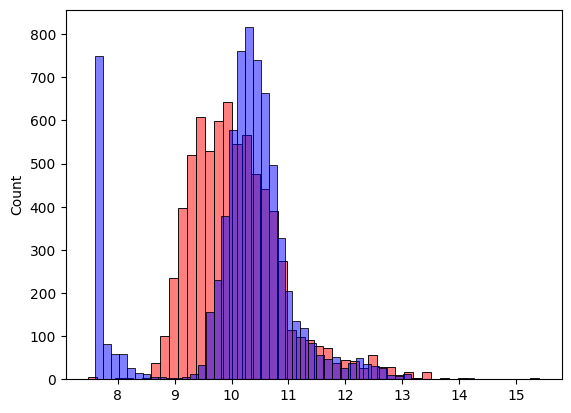

In [128]:
sns.histplot(y_pred, color = 'red', alpha =0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

## 2.9 RMSE

In [129]:
# RMSE : root mean square error
# 'E'rror : y_actual - y_pred
# 'S'quare : ( y_actual - y_pred) ** 2
# 'M'ean : np.mean(( y_actual - y_pred) ** 2)
# 'R'oot : np.sqrt(np.mean(( y_actual - y_pred) ** 2))

In [135]:
# def rmse(y, y_pred):
#     return  np.sqrt(np.mean(( y - y_pred) ** 2))

# more clear version
def rmse(y_actual, y_pred):
    se = (y_actual - y_pred) ** 2
    mse = np.mean(se)
    return np.sqrt(mse)

In [136]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## Validating model

In [140]:
def prepare_X(df, base):
    df_num = df[base]
    X = df_num.fillna(0).values
    return X

In [141]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [144]:
X_train = prepare_X(df_train, base)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val, base)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.761653099130156)

## Simple feature engineering

In [147]:
df.year.max()

np.int64(2017)

In [166]:
def prepare_X(df, base):
    df = df.copy()
    df['age'] = 2017 - df['year']
    features = list(base)
    features.append('age')
    df_num = df[features] 
    X = df_num.fillna(0).values
    return X

In [167]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [169]:
X_train = prepare_X(df_train, base)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val, base)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)


np.float64(0.5172055461058299)

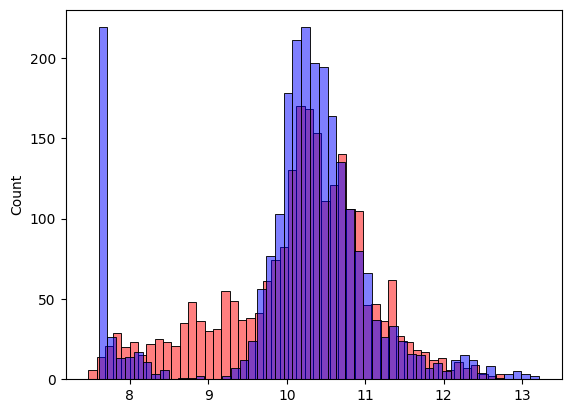

In [171]:
sns.histplot(y_pred , color = 'r', alpha = 0.5, bins =50)
sns.histplot(y_val, color = 'b', alpha = .5 ,bins =50)
plt.show()